In [10]:
import os
import cv2
import csv
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()
# Chọn file kaggle.json tải về ở bước 2 để tải lên

!mkdir '/root/.kaggle'
!cp kaggle.json '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 96% 588M/612M [00:16<00:00, 36.9MB/s]
100% 612M/612M [00:16<00:00, 38.7MB/s]


In [ ]:
!unzip /content/gtsrb-german-traffic-sign.zip  -d /content/dataset

In [1]:
from google.colab import drive, output

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

 
%cd "/content"
!rm -rf traffic_sign_detection
!git clone https://github.com/ptran1203/traffic_sign_detection


/content
Cloning into 'traffic_sign_detection'...
remote: Enumerating objects: 596, done.
remote: Counting objects: 100% (34/34), done.
remote: Total 596 (delta 33), reused 33 (delta 33), pack-reused 562
Receiving objects: 100% (596/596), 367.67 MiB | 39.25 MiB/s, done.
Resolving deltas: 100% (354/354), done.


In [ ]:
!kaggle datasets download -d phhasian0710/za-traffic-2020

100% 5.64G/5.66G [00:48<00:00, 188MB/s]
100% 5.66G/5.66G [00:48<00:00, 126MB/s]


In [ ]:
!unzip /content/za-traffic-2020.zip  -d /content/ZaloDataset

In [3]:
%cd traffic_sign_detection


/content/traffic_sign_detection


In [ ]:
import shutil
import os

os.chdir('source_image_dir_path')
dst_dir = "your_destination_dir_path"
for f in os.listdir():
    shutil.copy(f, dst_dir)

In [ ]:
import shutil
import os

os.chdir('/content/ZaloDataset/za_traffic_2020/traffic_train/images')
dst_dir = "/content/testing_img"

count = 0
for f in os.listdir():
    shutil.copy(f, dst_dir)
    count += 1
    if count == 400:
      break

In [ ]:
!zip -r /content/drive/MyDrive/CS231_Hoang_Nam_Vy/testing_image_zalo_dec.zip /content/testing_img

In [ ]:
ls

drive/       sample_data/  traffic_sign_detection/  za-traffic-2020.zip
kaggle.json  testing_img/  ZaloDataset/


In [ ]:
cd ../

/content


In [4]:
from prediction import get_inference_model, Prediction
import cv2
import utils

weight = '/content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5'
backbone = weight.split("_")[-1].replace(".h5", "")
print(backbone)

predictor = Prediction(get_inference_model(weight, backbone))

densenet121


In [5]:
!python3 train.py --input /content/ZaloDataset/za_traffic_2020/traffic_train/images\
                  --backbone densenet121\
                  --batch-size 4\
                  --init-from /content/drive/MyDrive/CS231_Hoang_Nam_Vy/weight_densenet121.h5\
                  --checkpoint-dir /content/weight

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/dist-packages/keras/metrics.py", line 24, in <module>
    from keras import activations
  File "/usr/local/lib/python3.7/dist-packages/keras/activations.py", line 20, in <module>
    from keras.layers import advanced_activations
  File "/usr/local/lib/python3.7/dist-packages/keras/layers/__init__.py", line 27, in <module>
    from keras.engine.base_preprocessing_layer import PreprocessingLayer
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/base_preprocessing_layer.py", line 19, in <module>
    from keras.engine import data_adapter
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py", line 38, in <module>
    import pandas as pd  # pylint: disable=g-import-not-at-top

In [23]:
ls

data_augmentation.py  __pycache__/
data_processing.py    README.md
download_data.sh*     requirement.txt
images/               traffic_signs_detection.ipynb
losses.py             train.py
model.py              train_traffic_sign_dataset.json
prediction.py         utils.py
predict.sh*           weights/


In [6]:
!python3 prediction.py --input /content/drive/MyDrive/CS231_Hoang_Nam_Vy/Test_Image/104.png\
                       --output /content/submission.json\
                       --weight /content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5\
                       --tiling

2022-06-02 02:46:10.746825: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Namespace(input='/content/drive/MyDrive/CS231_Hoang_Nam_Vy/Test_Image/104.png', output='/content/submission.json', save_dir='/content/infernece_images', scales='1024', tiling=True, weight='/content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5')
Test on 1 images
100% 1/1 [00:37<00:00, 37.49s/it]
Predict in 0:00:37.490283
Submission saved at /content/submission.json


Eval tren tap test

In [ ]:
os.chdir('/content/testing_img')

for img in os.listdir():
  for i in data:
    
  for i in csvFile['file_name']:
    if i == img:






Crop anh tu detection


In [7]:
label_name = [
'Cấm đi ngược chiều', 
'Cấm đỗ hoặc cấm dừng', 
'Cấm rẽ', 
'Giới hạn tốc độ tối đa', 
'Biển cấm', 
'Biển báo nguy hiểm',
'Biển hiệu lệnh và chỉ dẫn'
]

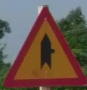

In [8]:
import json
import cv2
from PIL import Image 
from google.colab.patches import cv2_imshow

f = open ('/content/submission.json', "r")
data = json.loads(f.read())
img_test = []
img_test_Mobile = [] 
for i in data:
  img = cv2.imread(f"{i['image_id']}")
  x,y,w,h = i['bbox']
  crop_img = img[int(y):int(y+h),int(x):int(x+w)]
  cv2_imshow(crop_img)
  new_img = cv2.resize(crop_img, (50, 50))
  img_test.append(cv2.resize(crop_img, (50, 50)))
  img_test_Mobile = cv2.resize(crop_img, (224, 224))
  cv2.imwrite(f'/content/img/img{i["category_id"]}.png',new_img)

In [11]:
vgg19 = keras.models.load_model('/content/drive/MyDrive/CS231_Hoang_Nam_Vy/vgg19_newtest_32.h5')
mobileNet = keras.models.load_model('/content/drive/MyDrive/CS231_Hoang_Nam_Vy/MobileNet224.h5')

In [ ]:
def preprocess(image, out_side):
    height, width = image.shape[:2]
    scale = out_side / max(height, width)
    dx = (out_side - scale * width) / 2
    dy = (out_side - scale * height) / 2
    trans = np.array([[scale, 0, dx], [0, scale, dy]], dtype=np.float32)
    image = cv2.warpAffine(image, trans, (out_side, out_side), flags=cv2.INTER_AREA)
    image = cv2.resize(image, (out_side, out_side))
    return image
def load_test(path, label, out_side):
    image = cv2.imread(path)
    image = preprocess(image, out_side)
    return image, label 
def mixing(images, labels):
    images = np.array(images)
    labels = np.array(labels)
    s = np.arange(images.shape[0])
    np.random.seed(43)
    np.random.shuffle(s)
    images=images[s]
    labels=labels[s]
    return images, labels

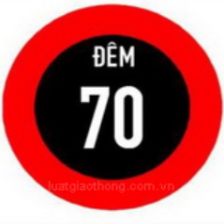

Giới hạn tốc độ tối đa


error: ignored

In [18]:
# img = cv2.imread('/content/img/img6.png')
# img = cv2.resize(img, (50, 50));
test_img_dir = '/content/img'
def printLabel(img, model, label_name, input_size):
    img = cv2.resize(img, input_size)
    img = np.array(img)
    cv2_imshow(img)
    #Predict the inputs on the model
    img = np.expand_dims(img, axis = 0)
    predict_img = model.predict(img)

    predict_img = predict_img[0]
    print(label_name[np.argmax(predict_img)])


# printLabel(cv2.imread('C:/Users/ADMIN/Desktop/MobileNet/Test/1.png'))
# start = time()

for img_name in os.listdir(test_img_dir):
  img = cv2.imread(os.path.join(test_img_dir, img_name))
  # printLabel(img, vgg19, label_name, (32,32))
  printLabel(img, mobileNet, label_name, (224,224))
# test_time = time() - start
# print('Test time: ', test_time)

# img_test.shape
# for img in img_test:
#   # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#   #printLabel(img, vgg16, 'VGG16', dict_bien_bao)
#   # printLabel(img_test, vgg19, 'VGG19', dict_bien_bao)
#   # printLabel(img_test, mobileNet, 'MobileNet', dict_bien_bao)

In [14]:
f = open ('/content/submission.json', "r")
data = json.loads(f.read())
img_test = []
img_test_Mobile = [] 
for i in data:
  img = cv2.imread(f"{i['image_id']}")
  x,y,w,h = i['bbox']
  crop_img = img[int(y-5):int(y+h+5),int(x-5):int(x+w+5)]
  new_img = cv2.resize(crop_img, (50, 50))
  printLabel(new_img, vgg16, 'VGG16', dict_bien_bao)
  # printLabel(new_img, vgg19, 'VGG19', dict_bien_bao)
  # printLabel(img_test, mobileNet, 'MobileNet', dict_bien_bao)
  cv2_imshow(new_img)
  cv2.imwrite(f'/content/img/img{i["category_id"]}.png',new_img)
f.close()

NameError: ignored

In [ ]:
import os

list = os.listdir('/content/ZaloDataset/za_traffic_2020/traffic_train/images') # dir is your directory path
number_files = len(list)
print(number_files)

4500


In [ ]:

import pandas
 
# opening the CSV file
with open('/content/ZaloDataset/za_traffic_2020/traffic_train/annotation.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = pandas.read_csv(file)
 
  for lines in csvFile:
        print(lines)

area
iscrowd
image_id
bbox
category_id
box_id
file_name
height
width
street_id
supercategory


In [ ]:

img_set = {}

count = 0

for i in csvFile['box_id']:

  img_id = int(csvFile['box_id'][i])

  img_id = int(csvFile['image_id']['box_id'][img_id])

  print(img_id)

  # x,y,w,h = csvFile['bbox']

  # if img_id not in img_set:
  #   img_set.add(img_id)
  #   img = cv2.imread()




  count += 1
  if count == 5:
    break


KeyError: ignored

In [ ]:
count = 0

dir = '/content/ZaloDataset/za_traffic_2020/traffic_train/images/'
dir2 = '/content/Visiualize_img'

for i in range(0,len(csvFile)):
  df = csvFile.loc[i,:]

  #x,y,w,h = df['bbox']

  new_df = df['bbox'].strip('][').split(',')

  bbox = [int(x) for x in new_df]

  x,y,w,h = bbox

  img = cv2.imread(dir + df['file_name'])

  img2 = cv2.rectangle( img, (x,y), (x+w,y+h), (255,255,255), 5)

  cv2_imshow(img2)

  #print(x,y,w,h)
  #print(csvFile.loc[i,:])

  count+=1

  if count == 10:
    break
  
  

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('g4g.png')
 
# Output img with window name as 'image'
cv2.imshow('image', img)
 